In [2]:
# Import Libraries
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Load Data
iris = datasets.load_iris()
iris_y = iris.target
iris = pd.DataFrame(iris.data,columns=iris.feature_names)
iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
1,4.9,3.0,1.4,0.2
109,7.2,3.6,6.1,2.5
60,5.0,2.0,3.5,1.0
133,6.3,2.8,5.1,1.5
116,6.5,3.0,5.5,1.8


In [4]:
# Check Data Quality
(((iris.isna()*1).sum())/len(iris))*100

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

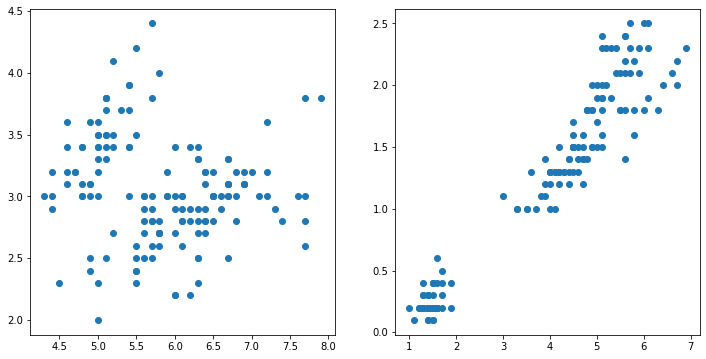

In [5]:
# Project data into scatter plot to see the correlation
fig = plt.figure(figsize=(12,6))
ax_sp = fig.add_subplot(121)
ax_pt = fig.add_subplot(122)
ax_sp.scatter(x=iris['sepal length (cm)'],y=iris['sepal width (cm)'])
ax_pt.scatter(x=iris['petal length (cm)'],y=iris['petal width (cm)'])

<Axes: xlabel='petal width (cm)', ylabel='Density'>

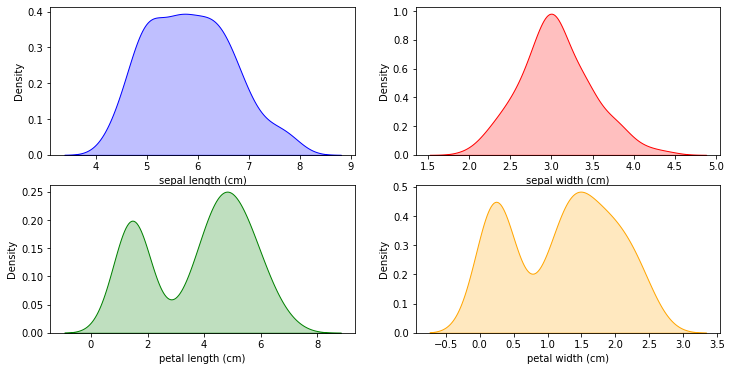

In [6]:
# Distribution of Sepal and Petal values
fig = plt.figure(figsize=(12,6))
ax_spl = fig.add_subplot(221)
ax_spw = fig.add_subplot(222)
ax_ptl = fig.add_subplot(223)
ax_ptw = fig.add_subplot(224)
sns.kdeplot(iris['sepal length (cm)'],ax=ax_spl,shade=True,color='blue')
sns.kdeplot(iris['sepal width (cm)'],ax=ax_spw,shade=True,color='red')
sns.kdeplot(iris['petal length (cm)'],ax=ax_ptl,shade=True,color='green')
sns.kdeplot(iris['petal width (cm)'],ax=ax_ptw,shade=True,color='orange')

In [7]:
# Normalise the data into 0 - 1 range
def NormVar(data):
    return ((data - data.min())/(data.max() - data.min()))

<Axes: xlabel='petal width (cm)', ylabel='Density'>

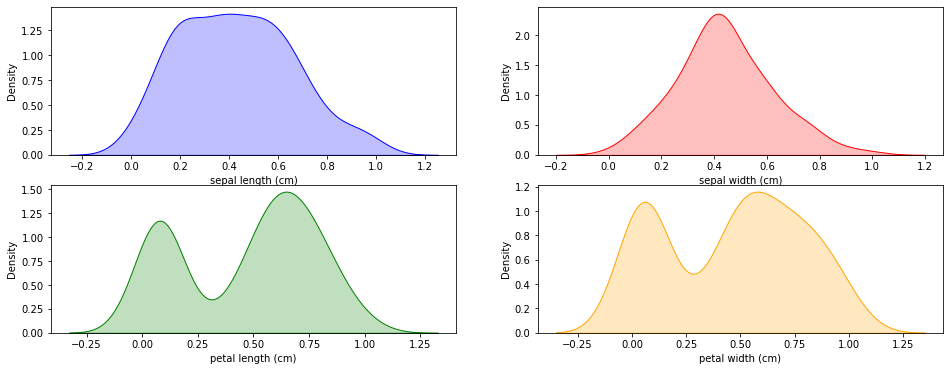

In [8]:
# Distribution of Sepal and Petal values after applying normalisation
fig = plt.figure(figsize=(16,6))
ax_spl = fig.add_subplot(221)
ax_spw = fig.add_subplot(222)
ax_ptl = fig.add_subplot(223)
ax_ptw = fig.add_subplot(224)
sns.kdeplot(NormVar(iris['sepal length (cm)']),ax=ax_spl,shade=True,color='blue')
sns.kdeplot(NormVar(iris['sepal width (cm)']),ax=ax_spw,shade=True,color='red')
sns.kdeplot(NormVar(iris['petal length (cm)']),ax=ax_ptl,shade=True,color='green')
sns.kdeplot(NormVar(iris['petal width (cm)']),ax=ax_ptw,shade=True,color='orange')

In [9]:
# Apply Noramlisation into the data set to bring them between 0 and 1
for i in iris.columns:
    iris[i] = NormVar(iris[i])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


<Axes: >

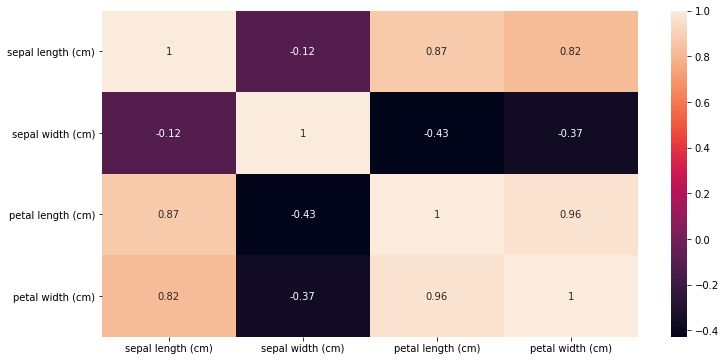

In [10]:
# Lets look at correlation between variables
plt.figure(figsize=(12,6))
sns.heatmap(iris.corr(),annot=True)

<Axes: xlabel='petal', ylabel='Density'>

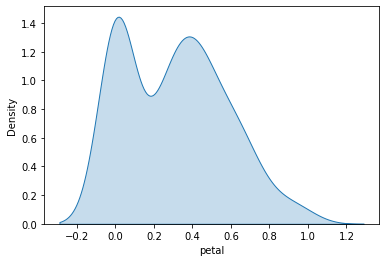

In [11]:
# As there is a very high correlation between petal length and Width, lets combine to make single column.
iris['petal'] = NormVar(iris['petal length (cm)'] * iris['petal length (cm)'])
sns.kdeplot(iris['petal'],shade=True)

In [12]:
# Drop the 2 columns as they are redundant now
iris = iris.drop(['petal length (cm)','petal width (cm)'],axis=1)

**Predictive Analytics using KNN**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# Split Data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(iris,iris_y,test_size=0.3)

In [15]:
print("Shape of Train/Test Data:")
print("=> Train X : ",X_train.shape)
print("=> Train y : ",y_train.shape)
print("=> Test X  : ",X_test.shape)
print("=> Test y  : ",y_test.shape)

Shape of Train/Test Data:
=> Train X :  (105, 3)
=> Train y :  (105,)
=> Test X  :  (45, 3)
=> Test y  :  (45,)


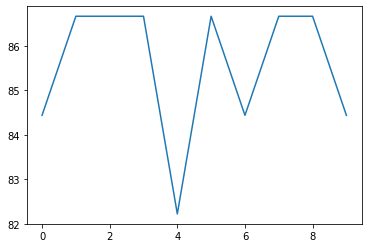

In [16]:
# fit the model with different values of n_neighbors, and plot the accuracy score
acc=list()
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc.append(round(metrics.accuracy_score(pred,y_test)*100,2))
plt.plot(acc)

In [17]:
# get the final predictions
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)
pred = model.predict(X_test)
round(metrics.accuracy_score(pred,y_test)*100,2)

84.44